In [11]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.impute import SimpleImputer

In [19]:
ds = pd.read_csv('funcionarios.csv')
ds.head(5)

,cargo,idade,salario,bonus,sócio
0,Diretor,45,24000.0,10000.0,sim
1,Analista,22,8000.0,2000.0,não
2,Programador,30,NaN,1000.0,não
3,Gerente,24,15100.0,NaN,não
4,Gerente,30,35000.0,6000.0,sim


In [20]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cargo    14 non-null     object 
 1   idade    14 non-null     int64  
 2   salario  12 non-null     float64
 3   bonus    12 non-null     float64
 4   sócio    14 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 692.0+ bytes


In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(ds[['salario', 'bonus']])
ds[['salario', 'bonus']] = imputer.transform(ds[['salario', 'bonus']])
ds = ds.rename(columns={'sócio': 'socio'})
ds.head()

,cargo,idade,salario,bonus,socio
0,Diretor,45,24000.000000,10000.0,sim
1,Analista,22,8000.000000,2000.0,não
2,Programador,30,16795.333333,1000.0,não
3,Gerente,24,15100.000000,7200.0,não
4,Gerente,30,35000.000000,6000.0,sim


In [22]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
ds.socio = le.fit(ds.socio).transform(ds.socio)
ds.cargo = le.fit(ds.cargo).transform(ds.cargo)
ds.head()


,cargo,idade,salario,bonus,socio
0,1,45,24000.000000,10000.0,1
1,0,22,8000.000000,2000.0,0
2,4,30,16795.333333,1000.0,0
3,3,24,15100.000000,7200.0,0
4,3,30,35000.000000,6000.0,1


In [23]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cargo    14 non-null     int64  
 1   idade    14 non-null     int64  
 2   salario  14 non-null     float64
 3   bonus    14 non-null     float64
 4   socio    14 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 692.0 bytes


In [28]:
ds.describe()

,cargo,idade,salario,bonus,socio
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2.285714,32.928571,16795.333333,7200.000000,0.428571
std,1.637473,12.499011,11365.046532,7001.098815,0.513553
min,0.000000,20.000000,2344.000000,1000.000000,0.000000
25%,1.000000,25.000000,7475.000000,2050.000000,0.000000
50%,2.500000,30.000000,15947.666667,6600.000000,0.000000
75%,4.000000,34.250000,22500.000000,9500.000000,1.000000
max,4.000000,65.000000,38000.000000,28000.000000,1.000000


<Axes: >

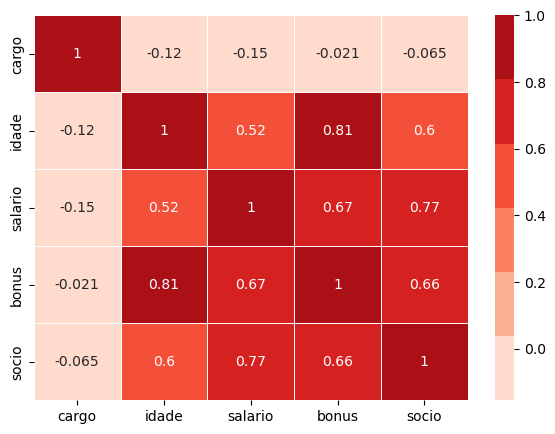

In [26]:
corr = ds.corr()
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, cmap=sns.color_palette("Reds"),linewidths=.5, annot=True)

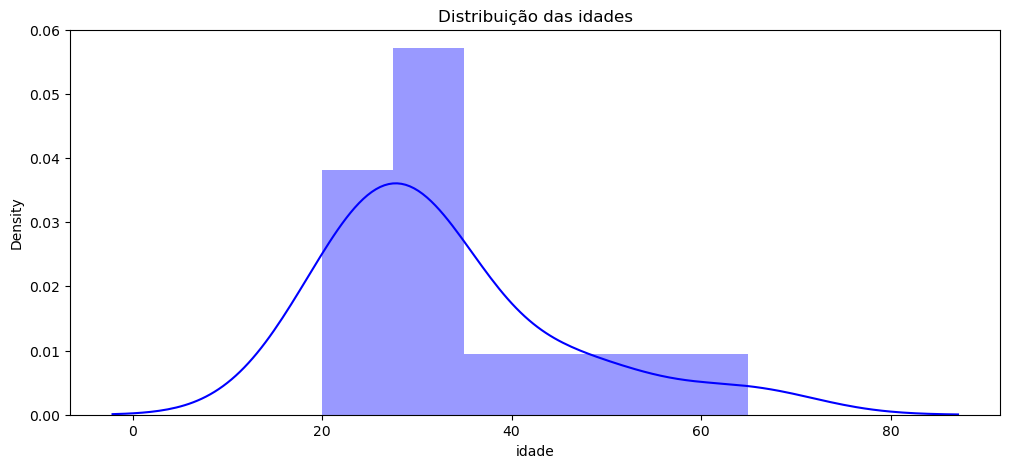

In [27]:
plt.figure(figsize=(12,5))
plt.title("Distribuição das idades")
ax = sns.distplot(ds['idade'], color='b')

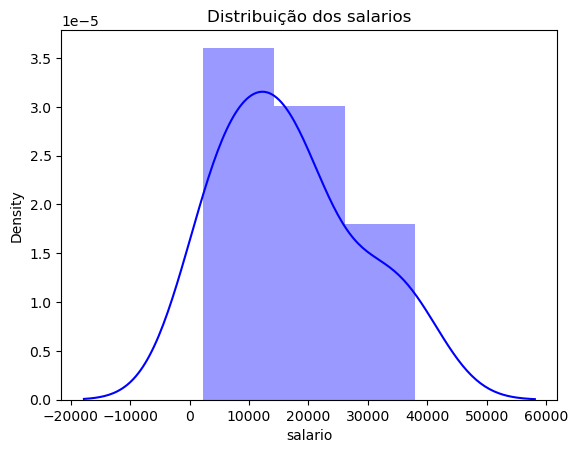

In [29]:
plt.title("Distribuição dos salarios")
ax = sns.distplot(ds['salario'], color='b')

Text(0.5, 1.0, 'Distribuicao de salarios por socios e nao socios')

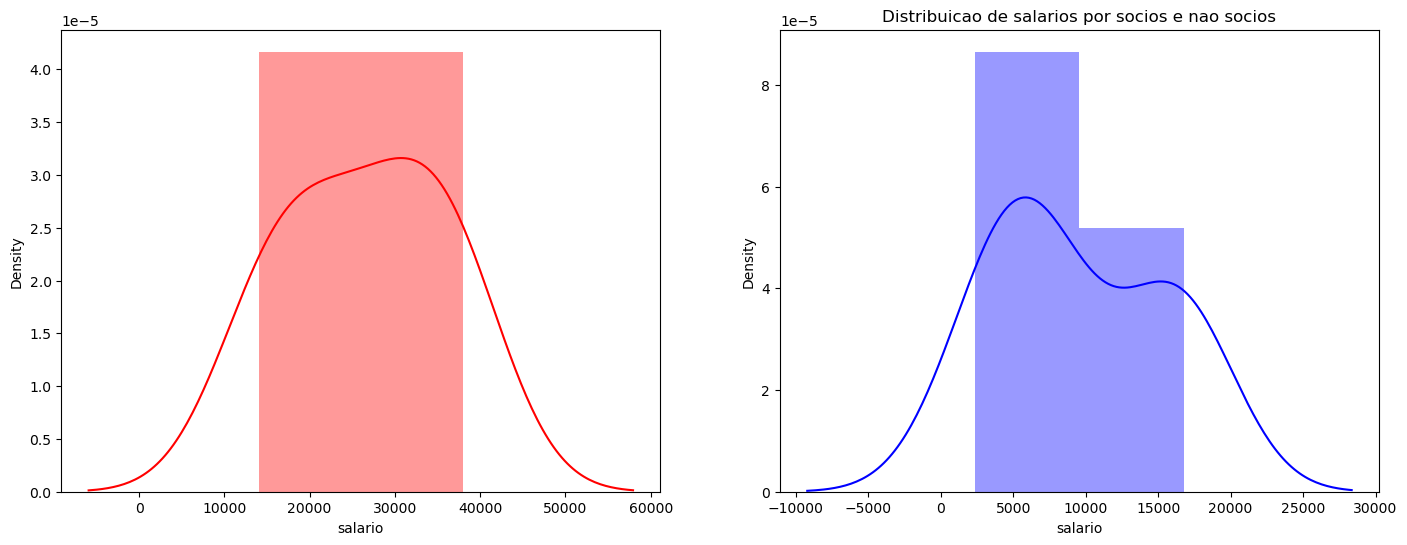

In [37]:
fig = plt.figure(figsize=(17,6))
ax = fig.add_subplot(121)
sns.distplot(ds[(ds.socio == 1)]['salario'], color='r', ax=ax)

ax = fig.add_subplot(122)
sns.distplot(ds[(ds.socio == 0)]['salario'], color='b', ax=ax)
ax.set_title("Distribuicao de salarios por socios e nao socios")



<Axes: title={'center': 'Idade e Cargo'}, xlabel='idade', ylabel='salario'>

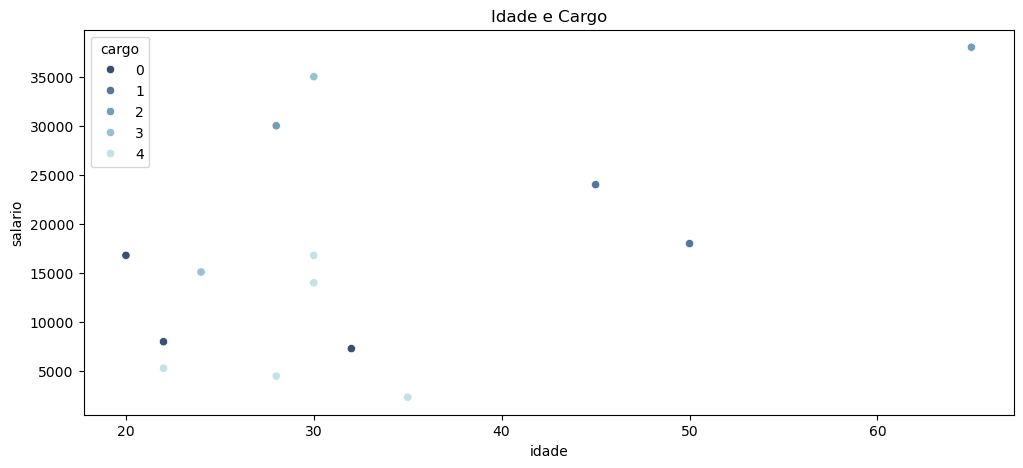

In [38]:
plt.figure(figsize=(12,5))
plt.title("Idade e Cargo")
sns.scatterplot(x= ds.idade, y=ds.salario, hue=ds.cargo, sizes=(12,5), palette="ch:r=-.2,d=.3_r")


new_labels = ['Mulheres', 'Homens']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

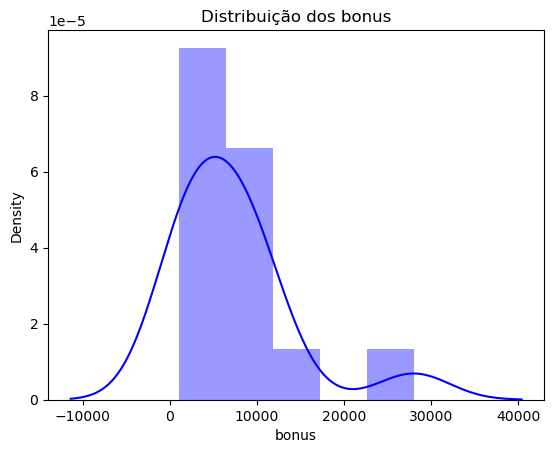

In [39]:
plt.title("Distribuição dos bonus")
ax = sns.distplot(ds['bonus'], color='b')

<h3>Regressão sem tratamento<h3>

In [40]:
x = ds.drop(['salario'],axis=1)
y = ds.salario

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [42]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [43]:
r_sq = lr.score(x,y)
print('Coefieciente de determinação (R2): ', r_sq)

Coefieciente de determinação (R2):  0.5346760240217573


<h3>Power Transform<h3>

In [59]:
ds_transformado = ds.copy()


In [60]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')
ds_transformado['bonus_box'] = pt.fit_transform(ds_transformado[['bonus']])
ds_transformado['bonus'] = ds_transformado['bonus_box']

ds_transformado.head()

,cargo,idade,salario,bonus,socio,bonus_box
0,1,45,24000.000000,0.775365,1,0.775365
1,0,22,8000.000000,-0.943049,0,-0.943049
2,4,30,16795.333333,-1.639978,0,-1.639978
3,3,24,15100.000000,0.412847,0,0.412847
4,3,30,35000.000000,0.214302,1,0.214302


In [61]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
ds_transformado['bonus_yeo'] = pt.fit_transform(ds_transformado[['bonus']])
ds_transformado.head()

,cargo,idade,salario,bonus,socio,bonus_box,bonus_yeo
0,1,45,24000.000000,0.775365,1,0.775365,0.767485
1,0,22,8000.000000,-0.943049,0,-0.943049,-0.944430
2,4,30,16795.333333,-1.639978,0,-1.639978,-1.603096
3,3,24,15100.000000,0.412847,0,0.412847,0.393259
4,3,30,35000.000000,0.214302,1,0.214302,0.190984


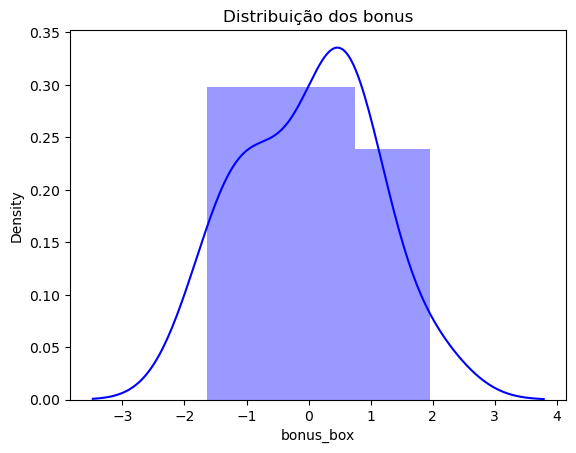

In [62]:
plt.title("Distribuição dos bonus")
ax = sns.distplot(ds_transformado['bonus_box'], color='b')

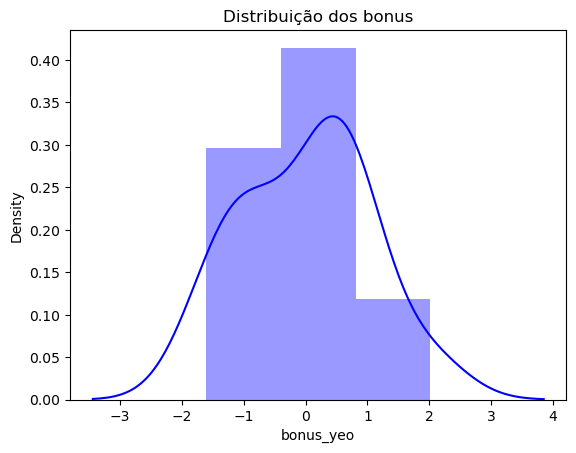

In [63]:
plt.title("Distribuição dos bonus")
ax = sns.distplot(ds_transformado['bonus_yeo'], color='b')

In [65]:
from sklearn.preprocessing import StandardScaler
ds_transformado[['idade','salario','bonus','socio','cargo']] = StandardScaler().fit_transform(ds_transformado[['idade','salario','bonus','socio','cargo']])
ds_transformado = ds_transformado.drop(['bonus_box','bonus_yeo'],axis=1)
ds_transformado.head()



,cargo,idade,salario,bonus,socio
0,-0.814822,1.002248,6.578623e-01,0.775365,1.154701
1,-1.448572,-0.907361,-8.031070e-01,-0.943049,-0.866025
2,1.086429,-0.243149,-9.119689e-17,-1.639978,-0.866025
3,0.452679,-0.741308,-1.548019e-01,0.412847,-0.866025
4,0.452679,-0.243149,1.662279e+00,0.214302,1.154701


In [68]:
x = ds_transformado.drop(['salario'],axis=1)
y = ds_transformado.salario


In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [70]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [71]:
r_sq = lr.score(x,y)
print('Coefieciente de determinação (R2): ', r_sq)

Coefieciente de determinação (R2):  0.4131725834904416


<h3> Funcion Transformer <h3>

In [79]:
def pow_2(X):
    return X + X

In [80]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(pow_2)
transformer.transform(ds.salario)

0     48000.000000
1     16000.000000
2     33590.666667
3     30200.000000
4     70000.000000
5     10600.000000
6     33590.666667
7     36000.000000
8     76000.000000
9     14600.000000
10     4688.000000
11     9000.000000
12    60000.000000
13    28000.000000
Name: salario, dtype: float64